Importing the dependencies


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [16]:
#load the dataset form csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [17]:
#inspecting the first five row of dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [18]:
# checking the number of rows and column
car_dataset.shape

(4340, 8)

In [19]:
#getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [21]:
# checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [35]:
# checking the  distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
1    2153
0    2123
2      40
3      23
4       1
Name: count, dtype: int64
seller_type
1    3244
0     994
2     102
Name: count, dtype: int64
transmission
0    3892
1     448
Name: count, dtype: int64
owner
0                       2832
1                       1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the categorical data

In [36]:
# encoding the fuel column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding the seller_type column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding the transmission column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding the owner column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [42]:
#important step
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


Splitting the data and Target

In [37]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [44]:
X = X.apply(pd.to_numeric, errors='coerce')
Y = pd.to_numeric(Y, errors='coerce')

In [45]:
X = X.dropna()
Y = Y[X.index]

In [46]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [47]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting the Trainning and Test data

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Trainning


  1. Linear Regression

In [49]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [50]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [51]:
# Prediction on Trainning data
trainning_data_prediction = lin_reg_model.predict(X_train)

In [52]:
# R Squared Error
error_score = metrics.r2_score(Y_train,trainning_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.42763612850186783


Visualize the actual prices and Predicted prices

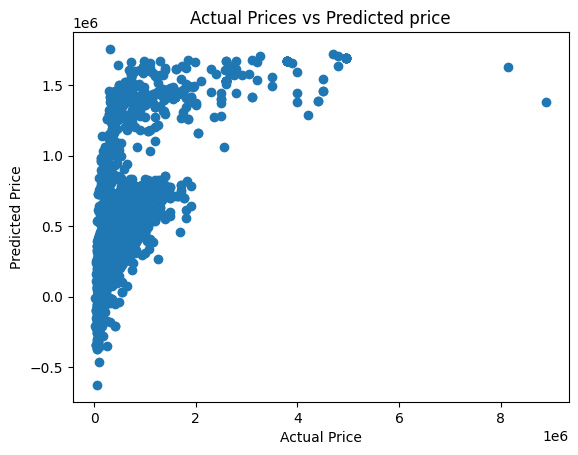

In [53]:
plt.scatter(Y_train,trainning_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted price")
plt.show()

In [54]:
# Prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [55]:
# R Squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.5027999353753417


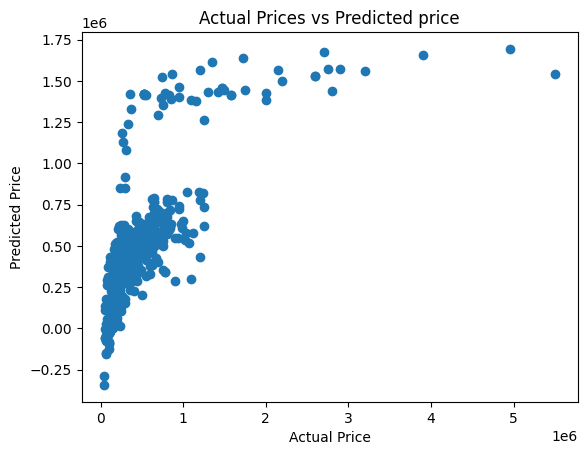

In [56]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted price")
plt.show()

   2. Lasso Regression

In [57]:
#loading the Lasso Regression Model
lass_reg_model = Lasso()

In [58]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [59]:
# Prediction on Trainning data
trainning_data_prediction = lass_reg_model.predict(X_train)

In [60]:
# R Squared Error
error_score = metrics.r2_score(Y_train,trainning_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.42763612844686605


Visualize the actual prices and Predicted prices

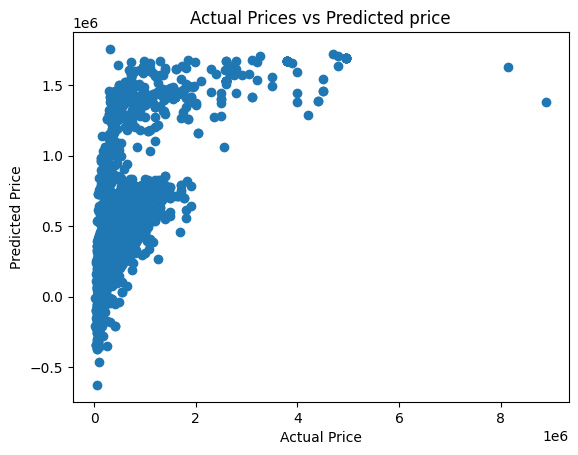

In [61]:
plt.scatter(Y_train,trainning_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted price")
plt.show()

In [62]:
# Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [63]:
# R Squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.5027994839428178


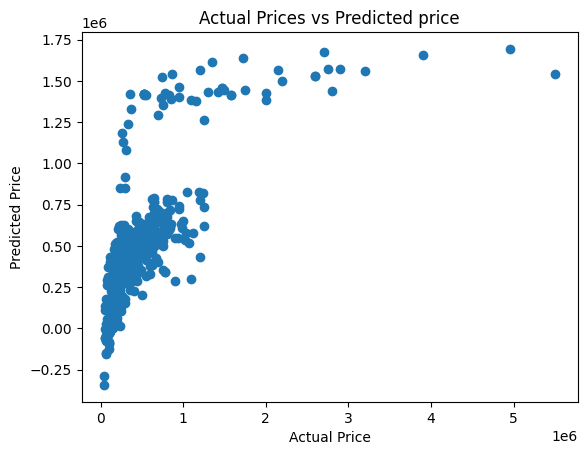

In [64]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted price")
plt.show()